In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
%matplotlib inline

In [74]:
path = 'resources/extended_dataset.parquet'
df = pd.read_parquet(path)
df.head(2)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,...,Re-inspection,Community,Neighborhood,Ward,Precinct,Violation IDs,Nb Violations,Nb Violations of high severity,Nb Violations of medium severity,Nb Violations of low severity
0,2320519,SALAM RESTAURANT,SALAM RESTAURANT,2002822,Restaurant,High,4634-4636 N KEDZIE AVE,60625,2019-10-25,Complaint,...,True,ALBANY PARK,"NORTH PARK,ALBANY PARK",33,27,[None],0,0,0,0
1,2320509,TAQUERIA EL DORADO,TAQUERIA EL DORADO,2694960,Restaurant,High,2114 W LAWRENCE AVE,60625,2019-10-25,License,...,True,LINCOLN SQUARE,LINCOLN SQUARE,47,38,"[3, 5, 25, 50, 53, 53, 56, 58]",8,2,1,5


In [75]:
community_areas = pd.read_csv('resources/community_areas_infos.csv', delimiter=',').set_index('Community')
community_areas.index = community_areas.index.str.upper()
community_areas.head()

,Community Area Number,Percent of housing crowded,Percent households below poverty,Percent aged 16+ unemployed,Percent aged 25+ without high school diploma,Percent aged under 18 or over 64,Per capita income,Hardship index
Community,,,,,,,,
ROGERS PARK,1.0,7.7,23.6,8.7,18.2,27.5,23939,39.0
WEST RIDGE,2.0,7.8,17.2,8.8,20.8,38.5,23040,46.0
UPTOWN,3.0,3.8,24.0,8.9,11.8,22.2,35787,20.0
LINCOLN SQUARE,4.0,3.4,10.9,8.2,13.4,25.5,37524,17.0
NORTH CENTER,5.0,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [76]:
mean_nb_violations_by_community = df[['Community', 'Nb Violations', 'Nb Violations of high severity', 'Nb Violations of medium severity', 'Nb Violations of low severity']].groupby('Community').mean()
mean_nb_violations_by_community.head()

,Nb Violations,Nb Violations of high severity,Nb Violations of medium severity,Nb Violations of low severity
Community,,,,
ALBANY PARK,3.516401,0.325109,0.294049,2.897242
ARCHER HEIGHTS,3.185700,0.346574,0.324727,2.514399
ARMOUR SQUARE,3.578030,0.380303,0.308712,2.889015
ASHBURN,2.854296,0.250311,0.220423,2.383562
AUBURN GRESHAM,3.190850,0.271895,0.299782,2.619172


In [82]:
df_joined = mean_nb_violations_by_community.join(community_areas)
df_joined.head()

,Nb Violations,Nb Violations of high severity,Nb Violations of medium severity,Nb Violations of low severity,Community Area Number,Percent of housing crowded,Percent households below poverty,Percent aged 16+ unemployed,Percent aged 25+ without high school diploma,Percent aged under 18 or over 64,Per capita income,Hardship index
Community,,,,,,,,,,,,
ALBANY PARK,3.516401,0.325109,0.294049,2.897242,14.0,11.3,19.2,10.0,32.9,32.0,21323.0,53.0
ARCHER HEIGHTS,3.185700,0.346574,0.324727,2.514399,57.0,8.5,14.1,16.5,35.9,39.2,16134.0,67.0
ARMOUR SQUARE,3.578030,0.380303,0.308712,2.889015,34.0,5.7,40.1,16.7,34.5,38.3,16148.0,82.0
ASHBURN,2.854296,0.250311,0.220423,2.383562,70.0,4.0,10.4,11.7,17.7,36.9,23482.0,37.0
AUBURN GRESHAM,3.190850,0.271895,0.299782,2.619172,71.0,4.0,27.6,28.3,18.5,41.9,15528.0,74.0


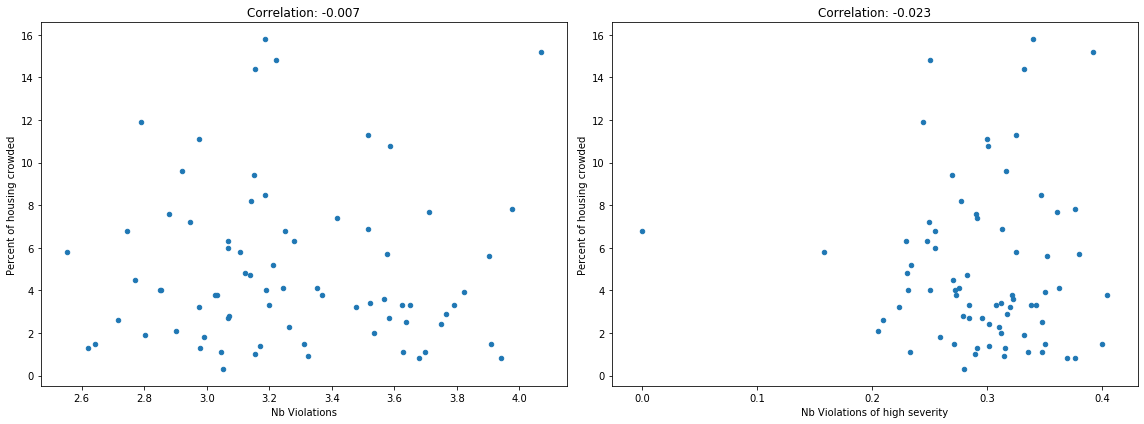

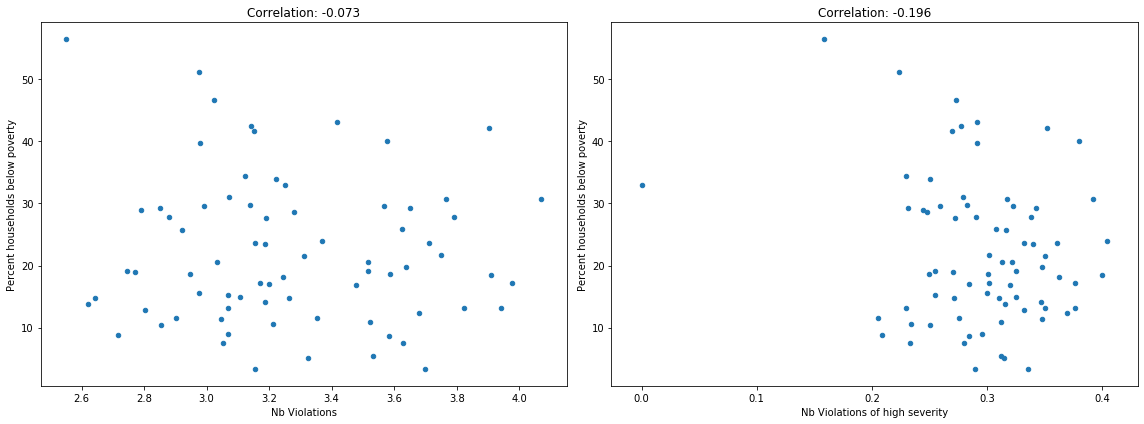

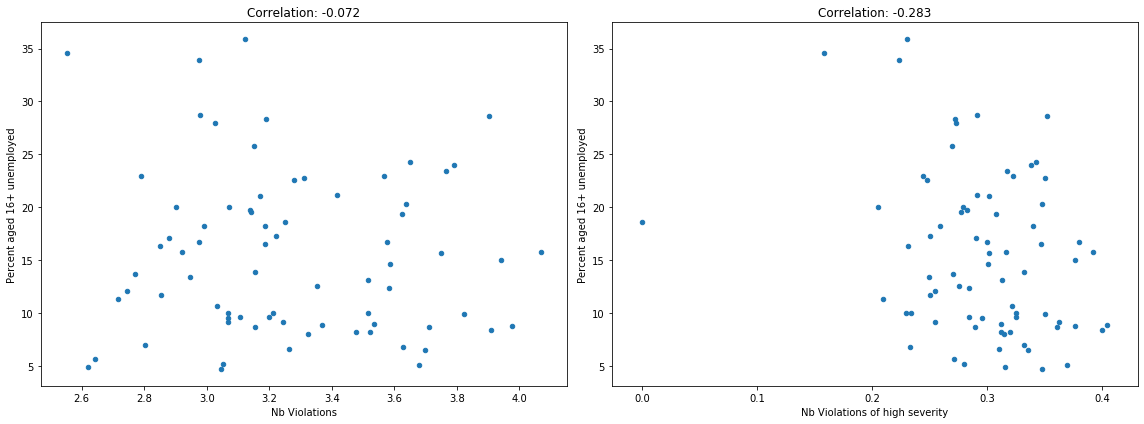

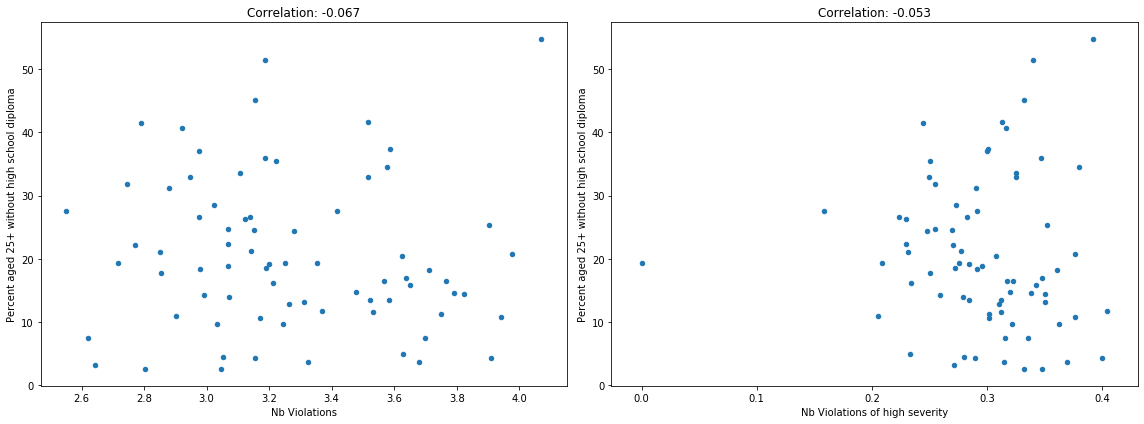

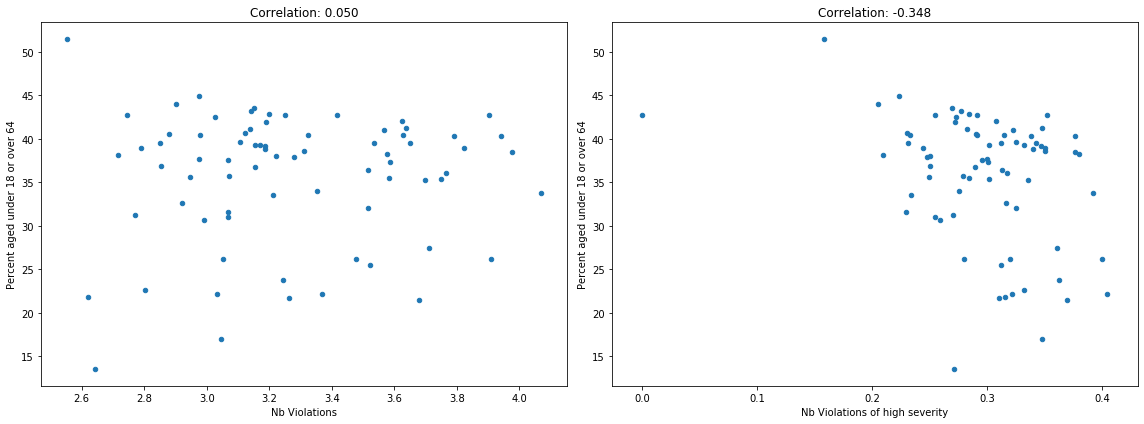

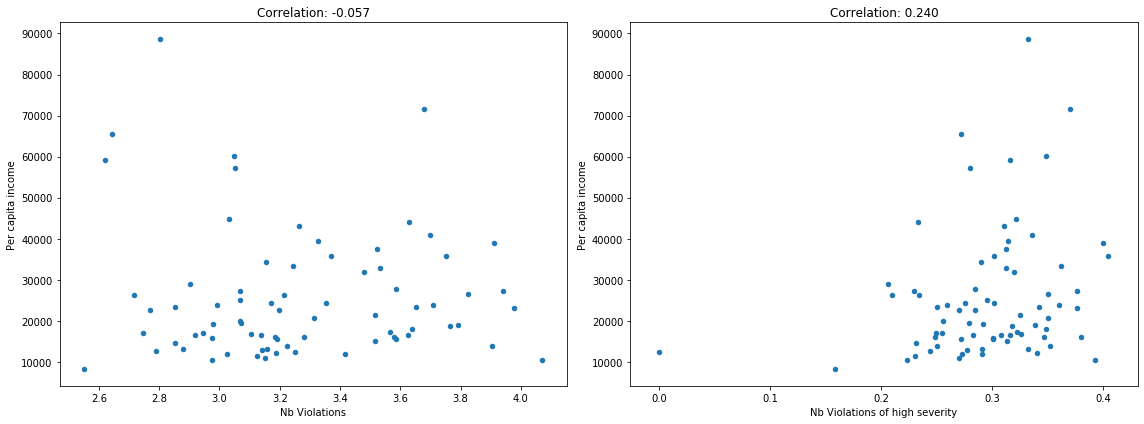

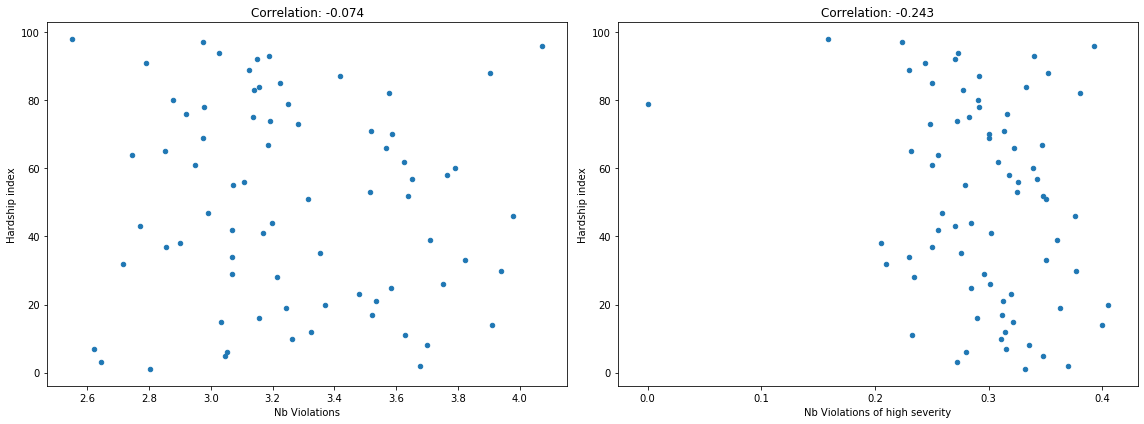

In [101]:
for column_name in community_areas.columns[1:]:
    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    
    df_joined[['Nb Violations', column_name]].plot.scatter(x='Nb Violations', y=column_name, ax=ax[0])
    ax[0].set_title('Correlation: {}'.format("%.3f" % df_joined['Nb Violations'].corr(df_joined[column_name])))
    
    df_joined[['Nb Violations of high severity', column_name]].plot.scatter(x='Nb Violations of high severity', y=column_name, ax=ax[1])
    ax[1].set_title('Correlation: {}'.format("%.3f" % df_joined['Nb Violations of high severity'].corr(df_joined[column_name])))
    
    plt.tight_layout()
    plt.show()

Sadly we have absolutly no correlation between the number of violations and the 'life levels' of the areas.